In [1]:
import pandas as pd

df_flights = pd.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/master/challenges/data/flights.csv')
df_flights.head()
df_flights.tail()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.0,1945,18,1,0
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,Fort Lauderdale-Hollywood International,Fort Lauderdale,FL,1020,24,1.0,1218,61,1,0
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1540,30,1.0,1935,15,1,0
271938,2013,5,7,2,HA,13830,Kahului Airport,Kahului,HI,12173,Honolulu International,Honolulu,HI,609,-5,0.0,641,-6,0,0
271939,2013,6,11,2,UA,14771,San Francisco International,San Francisco,CA,14100,Philadelphia International,Philadelphia,PA,1338,60,1.0,2200,40,1,0


In [2]:
df_flights.describe()
print('no nulos:', df_flights['DepDel15'].notnull().sum())
print('nulos:', df_flights['DepDel15'].isnull().sum())


no nulos: 269179
nulos: 2761


In [3]:
from matplotlib import pyplot as plt

%matplotlib inline

from matplotlib import pyplot as plt

# Create a bar plot of name vs grade



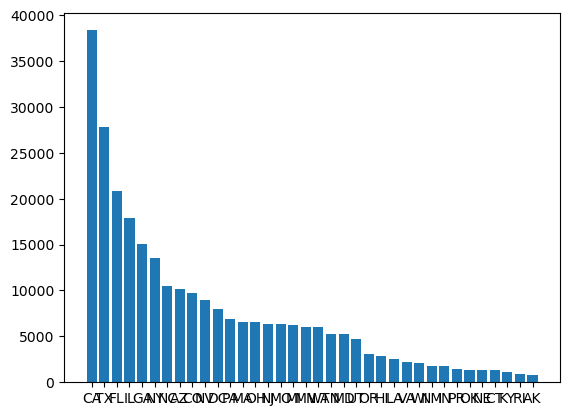

In [29]:
df_flights.OriginState.value_counts()

import pandas as pd

value_counts_df = pd.DataFrame(df_flights.OriginState.value_counts())

value_counts_df = df_flights['OriginState'].value_counts().reset_index()
value_counts_df.columns = ['OriginState', 'count']

# Plot the bar chart
plt.bar(x=value_counts_df['OriginState'], height=value_counts_df['count'])

plt.show()

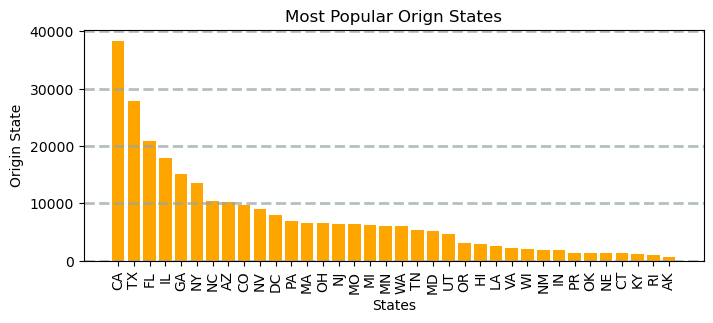

In [15]:
fig = plt.figure(figsize=(8,3))
plt.bar(x=value_counts_df['OriginState'], height=value_counts_df['count'], color='orange')

# Customize the chart
plt.title('Most Popular Orign States')
plt.xlabel('States')
plt.ylabel('Origin State')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Display the plot
plt.show()


In [34]:
df_flights['DepDel15'].groupby(df_flights['OriginState']).value_counts()

late = df_flights.groupby(['OriginState', 'DepDel15']).size().reset_index(name='count')

late

,OriginState,DepDel15,count
0,AK,0.0,677
1,AK,1.0,71
2,AZ,0.0,8337
3,AZ,1.0,1793
4,CA,0.0,30525
...,...,...,...
67,VA,1.0,385
68,WA,0.0,5138
69,WA,1.0,866
70,WI,0.0,1709


C:\Users\Jesus Sanchez\AppData\Local\Temp\ipykernel_41880\1196312430.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


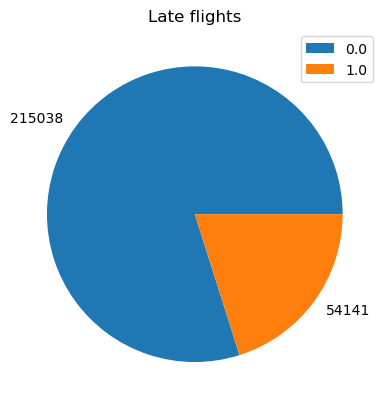

In [39]:

# Create a pie chart of pass counts on the second axis
late_counts = df_flights['DepDel15'].value_counts()

plt.pie(late_counts, labels=late_counts)
plt.title('Late flights')
plt.legend(late_counts.keys().tolist())

# Show the figure
fig.show()

C:\Users\Jesus Sanchez\AppData\Local\Temp\ipykernel_41880\409825782.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(value_counts_df.OriginState, rotation=90)
C:\Users\Jesus Sanchez\AppData\Local\Temp\ipykernel_41880\409825782.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


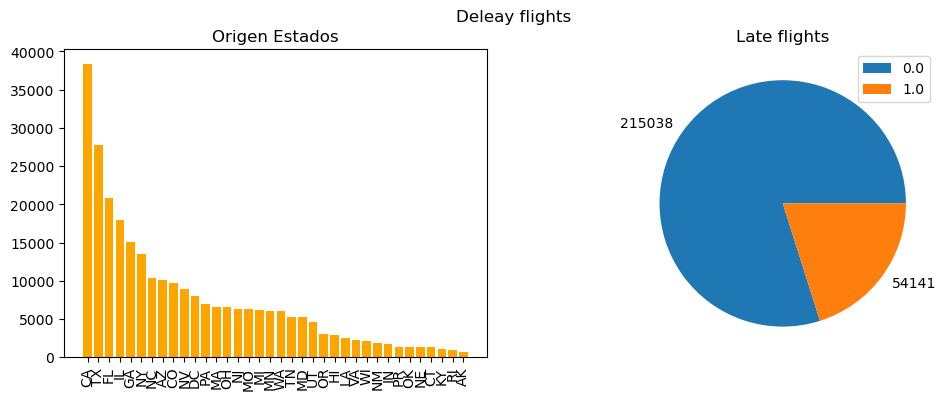

In [48]:
fig, ax = plt.subplots(1, 2, figsize = (12,4))

# Create a bar plot of name vs grade on the first axis
ax[0].bar(x=value_counts_df['OriginState'], height=value_counts_df['count'], color='orange')

ax[0].set_title('Origen Estados')
ax[0].set_xticklabels(value_counts_df.OriginState, rotation=90)

# Create a pie chart of pass counts on the second axis
late_counts = df_flights['DepDel15'].value_counts()

ax[1].pie(late_counts, labels=late_counts)
ax[1].set_title('Late flights')
ax[1].legend(late_counts.keys().tolist())

# Add a title to the Figure
fig.suptitle('Deleay flights')

# Show the figure
fig.show()

C:\Users\Jesus Sanchez\AppData\Local\Temp\ipykernel_41880\458107948.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


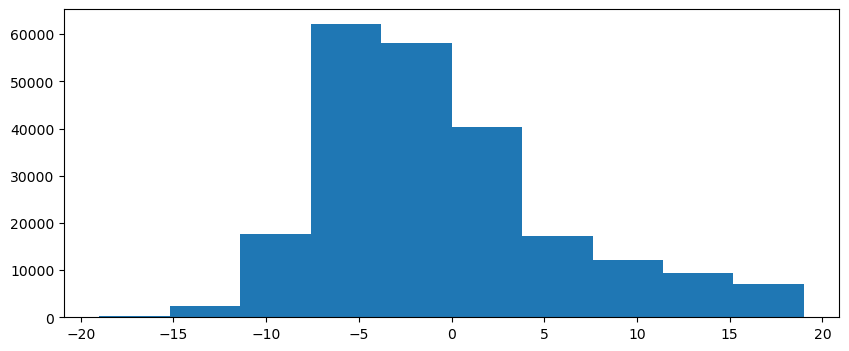

In [77]:
# Get the variable to examine
var_data = df_flights[(df_flights['DepDelay']>-20) & (df_flights['DepDelay']<20)].DepDelay

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var_data)

# Show the figure
fig.show()

Minimum:-19.00
Mean:-0.65
Median:-2.00
Mode:-3.00
Maximum:19.00



C:\Users\Jesus Sanchez\AppData\Local\Temp\ipykernel_41880\1569918494.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


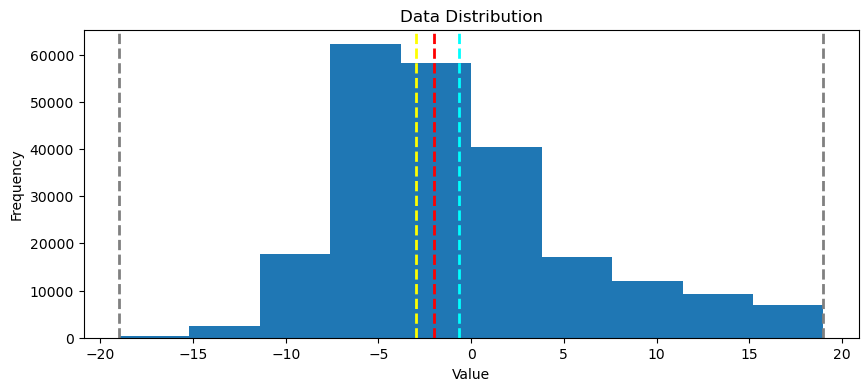

In [79]:
# Get the variable to examine
var = df_flights[(df_flights['DepDelay']>-20) & (df_flights['DepDelay']<20)].DepDelay

# Get statistics
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var)

# Add lines for the statistics
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

C:\Users\Jesus Sanchez\AppData\Local\Temp\ipykernel_41880\624881626.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


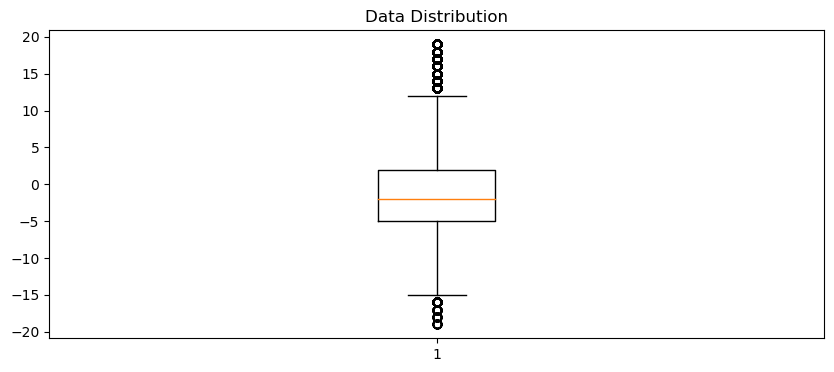

In [82]:
var = df_flights[(df_flights['DepDelay']>-20) & (df_flights['DepDelay']<20)].DepDelay

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.boxplot(var)

# Add titles and labels
plt.title('Data Distribution')

# Show the figure
fig.show()

DepDel15       0.0   1.0
OriginState             
AK             677    71
AZ            8337  1793
CA           30525  7382
CO            7075  2550
CT            1127   209
DC            6453  1400
FL           16760  3971
GA           11932  3112
HI            2588   307
IL           12613  4976
IN            1503   290
KY             892   214
LA            2103   405
MA            5275  1243
MD            3891  1287
MI            5108  1081
MN            5035   957
MO            5050  1268
NC            8525  1824
NE            1135   204
NJ            4782  1483
NM            1463   353
NV            6929  2009
NY           10449  2810
OH            5297  1130
OK            1132   234
OR            2648   402
PA            5644  1214
PR            1120   273
RI             797   154
TN            4243   995
TX           21199  6306
UT            4053   610
VA            1831   385
WA            5138   866
WI            1709   373


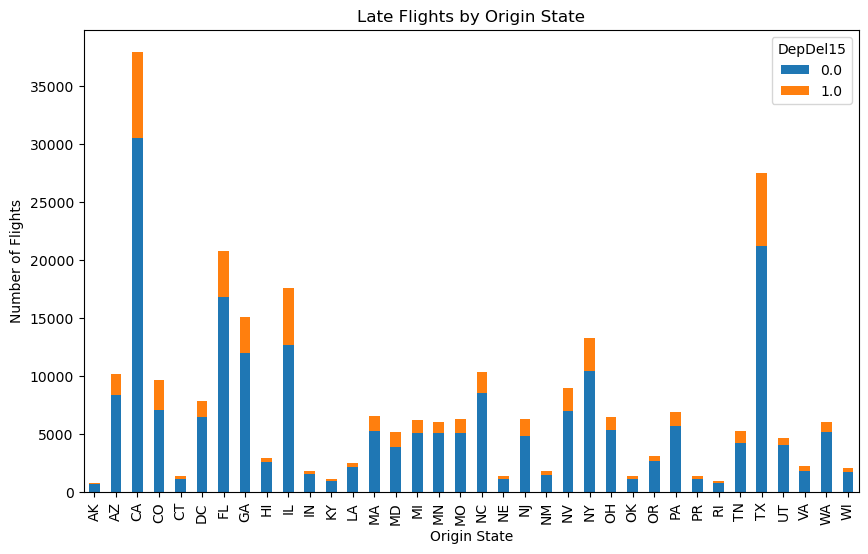

In [95]:
# Group the data by OriginState and DepDel15 and count the occurrences
grouped = df_flights.groupby(['OriginState', 'DepDel15'])['DepDel15'].count().unstack()
print(grouped)

# Plot the grouped data
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the title and axis labels
ax.set_title('Late Flights by Origin State')
ax.set_xlabel('Origin State')
ax.set_ylabel('Number of Flights')

# Show the plot
plt.show()


In [98]:
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()



NameError: name 'df_sample' is not defined